In [36]:
import pickle
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
splits = ['scaffold', 'random']
datasets = ['pdbbind', 'platinum']
tasks = ['all', 'easy', 'hard']
results_dir = 'results/'
iterations = range(5)

In [3]:
bioactive_accuracy_df = pd.DataFrame()
regression_df = pd.DataFrame()
ranking_df = pd.DataFrame()

In [4]:
for split in splits :

    for iteration in iterations :
        
        for dataset in datasets :
            
            experiment_name = f'{split}_split_{iteration}_new'
            evaluation_name = f'{experiment_name}_{dataset}'
            
            working_dir = os.path.join(results_dir, evaluation_name)
            for task in tasks :
                dataset_results_path = os.path.join(working_dir, f'dataset_results_{task}.p')
                with open(dataset_results_path, 'rb') as f:
                    dataset_results = pickle.load(f)

                dataset_results['bioactive_accuracy']['split'] = split
                dataset_results['bioactive_accuracy']['dataset'] = dataset
                dataset_results['bioactive_accuracy']['task'] = task
                bioactive_accuracy_df = bioactive_accuracy_df.append(pd.Series(dataset_results['bioactive_accuracy']), ignore_index=True)

                for average_type in dataset_results['regression'] :
                    dataset_results['regression'][average_type]['split'] = split
                    dataset_results['regression'][average_type]['dataset'] = dataset
                    dataset_results['regression'][average_type]['task'] = task
                    dataset_results['regression'][average_type]['average_type'] = average_type
                    regression_df = regression_df.append(pd.Series(dataset_results['regression'][average_type]), ignore_index=True)

                for ranker in dataset_results['ranking'] :
                    dataset_results['ranking'][ranker]['split'] = split
                    dataset_results['ranking'][ranker]['dataset'] = dataset
                    dataset_results['ranking'][ranker]['task'] = task
                    dataset_results['ranking'][ranker]['ranker'] = ranker
                    ranking_df = ranking_df.append(pd.Series(dataset_results['ranking'][ranker]), ignore_index=True)

In [32]:
bioactive_accuracy_df['subset'] = bioactive_accuracy_df['task']

In [33]:
bioactive_accuracy_df.head()

,dataset,mean_top1_accuracy,mean_topN_accuracy,median_all_bioactive,median_min_bioactive,q1_all_bioactive,q1_min_bioactive,q3_all_bioactive,q3_min_bioactive,split,task,subset
0,pdbbind,0.314501,0.308546,5.0,4.0,0.0,0.0,25.0,24.0,scaffold,all,all
1,pdbbind,0.334347,0.324698,3.0,2.0,0.0,0.0,9.0,7.0,scaffold,easy,easy
2,pdbbind,0.305593,0.301296,8.0,8.0,0.0,0.0,35.0,35.0,scaffold,hard,hard
3,platinum,0.331647,0.333061,4.0,3.0,0.0,0.0,21.0,20.0,scaffold,all,all
4,platinum,0.339546,0.348652,2.0,2.0,0.0,0.0,7.0,6.0,scaffold,easy,easy


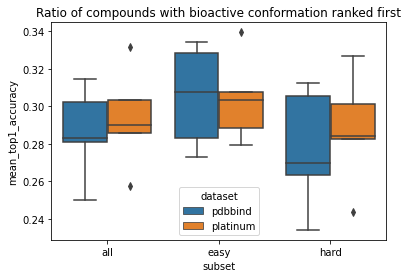

In [49]:
data = bioactive_accuracy_df[bioactive_accuracy_df['split'] == 'scaffold']
sns.boxplot(data=data, x='subset', y='mean_top1_accuracy', hue='dataset')
plt.title('Ratio of compounds with bioactive conformation ranked first')
plt.savefig('figures/mean_top1_accuracy.png', dpi=200)

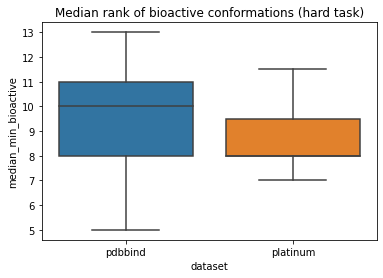

In [48]:
data = bioactive_accuracy_df[bioactive_accuracy_df['split'] == 'scaffold']
sns.boxplot(data=data[data['subset']=='hard'], x='dataset', y='median_min_bioactive')
plt.title('Median rank of bioactive conformations (hard task)')
plt.savefig('figures/median_min_bioactive.png', dpi=200)

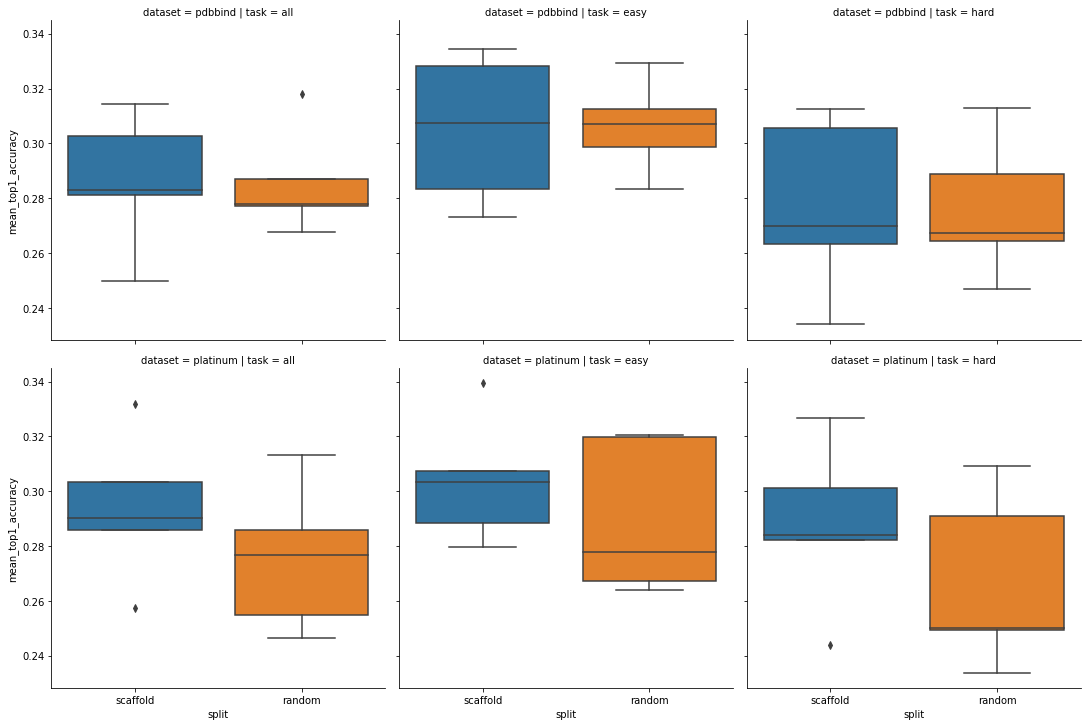

In [13]:
sns.catplot(data=bioactive_accuracy_df, x='split', y='mean_top1_accuracy', row='dataset', col='task', kind='box')

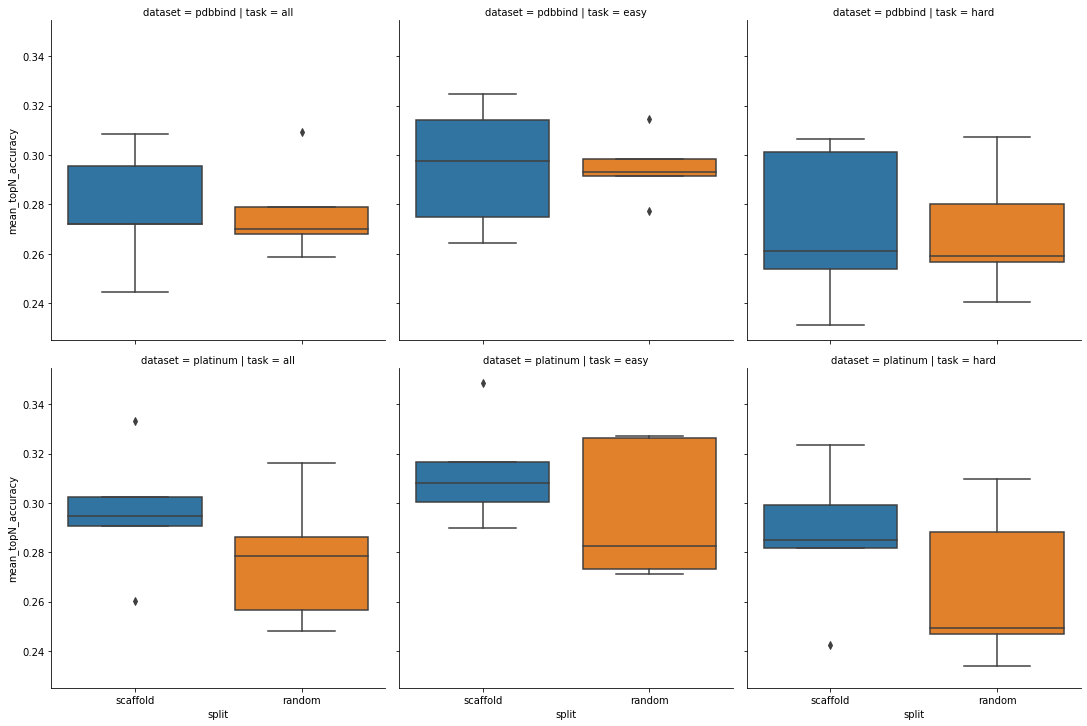

In [14]:
sns.catplot(data=bioactive_accuracy_df, x='split', y='mean_topN_accuracy', row='dataset', col='task', kind='box')

In [62]:
regression_df['subset'] = regression_df['task']

In [28]:
regression_df.head()

,average_type,dataset,pearson_all,pearson_gen,r2_all,r2_gen,rmse_all,rmse_bio,rmse_gen,spearman_all,spearman_gen,split,task
0,Micro,pdbbind,0.689525,0.567887,0.450394,0.238070,0.669603,1.265944,0.766212,0.655903,0.533606,scaffold,all
1,Macro,pdbbind,0.297648,0.279255,-234.640019,-2.307263,0.604586,1.309312,0.575703,0.265644,0.259636,scaffold,all
2,Micro,pdbbind,0.546329,0.395388,0.201573,-0.068928,0.632298,0.877448,0.687485,0.483954,0.318742,scaffold,easy
3,Macro,pdbbind,0.258597,0.265793,-755.792965,-5.086628,0.551283,0.911603,0.501464,0.242191,0.245722,scaffold,easy
4,Micro,pdbbind,0.674387,0.546802,0.427687,0.206936,0.673735,1.461812,0.774371,0.640519,0.511594,scaffold,hard


In [53]:
data

,average_type,dataset,pearson_all,pearson_gen,r2_all,r2_gen,rmse_all,rmse_bio,rmse_gen,spearman_all,spearman_gen,split,task


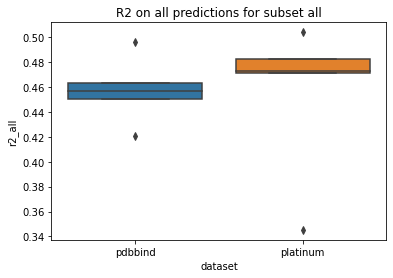

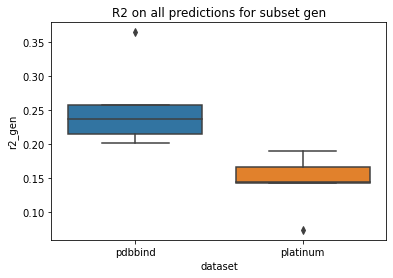

In [60]:
data = regression_df[(regression_df['split'] == 'scaffold') & (regression_df['average_type'] == 'Micro') & (regression_df['task'] == 'all')]
for subset in ['all', 'gen'] :
    sns.boxplot(data=data, x='dataset', y=f'r2_{subset}')
    plt.title(f'R2 on all predictions for subset {subset}')
    plt.savefig(f'figures/r2_{subset}.png', dpi=200)
    plt.show()

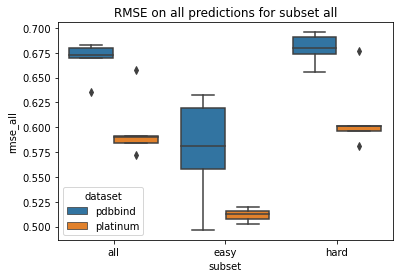

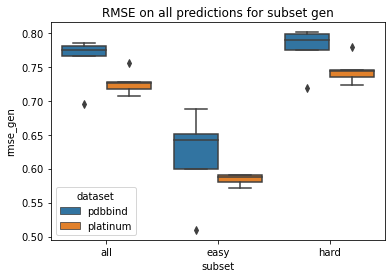

In [63]:
data = regression_df[(regression_df['split'] == 'scaffold') & (regression_df['average_type'] == 'Micro')]
for subset in ['all', 'gen'] :
    sns.boxplot(data=data, x='subset', y=f'rmse_{subset}', hue='dataset')
    plt.title(f'RMSE on all predictions for subset {subset}')
    plt.savefig(f'figures/rmse_{subset}.png', dpi=200)
    plt.show()

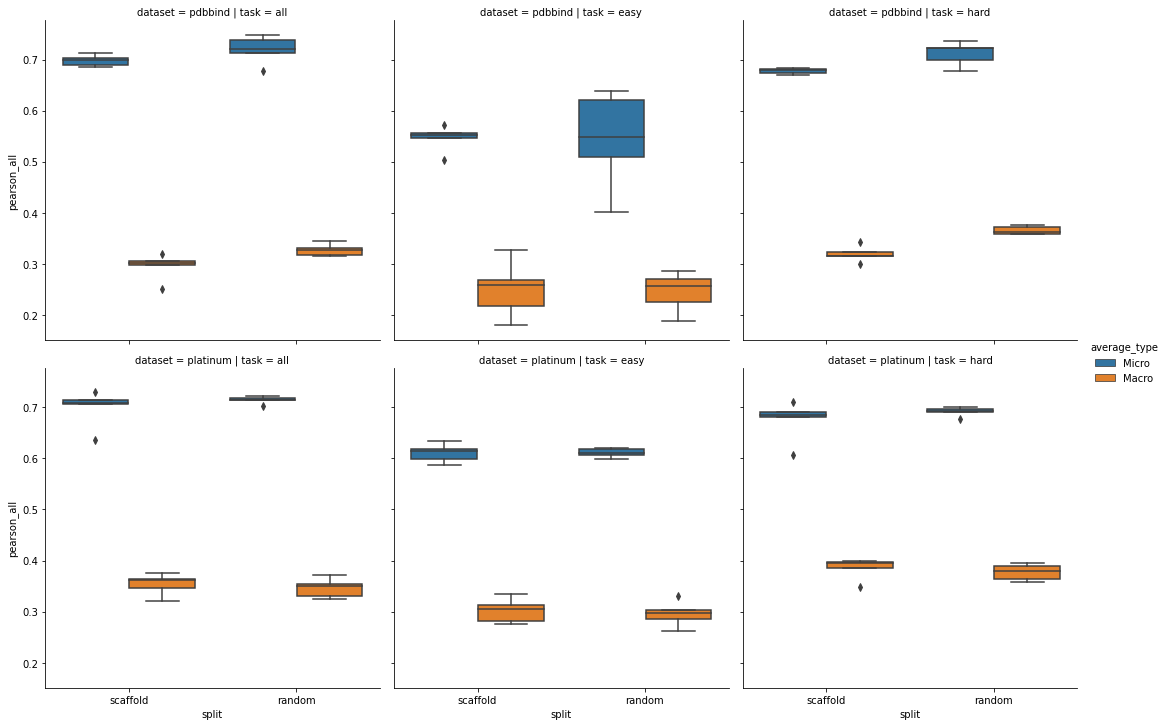

In [19]:
sns.catplot(data=regression_df, x='split', y='pearson_all', hue='average_type', row='dataset', col='task', kind='box')

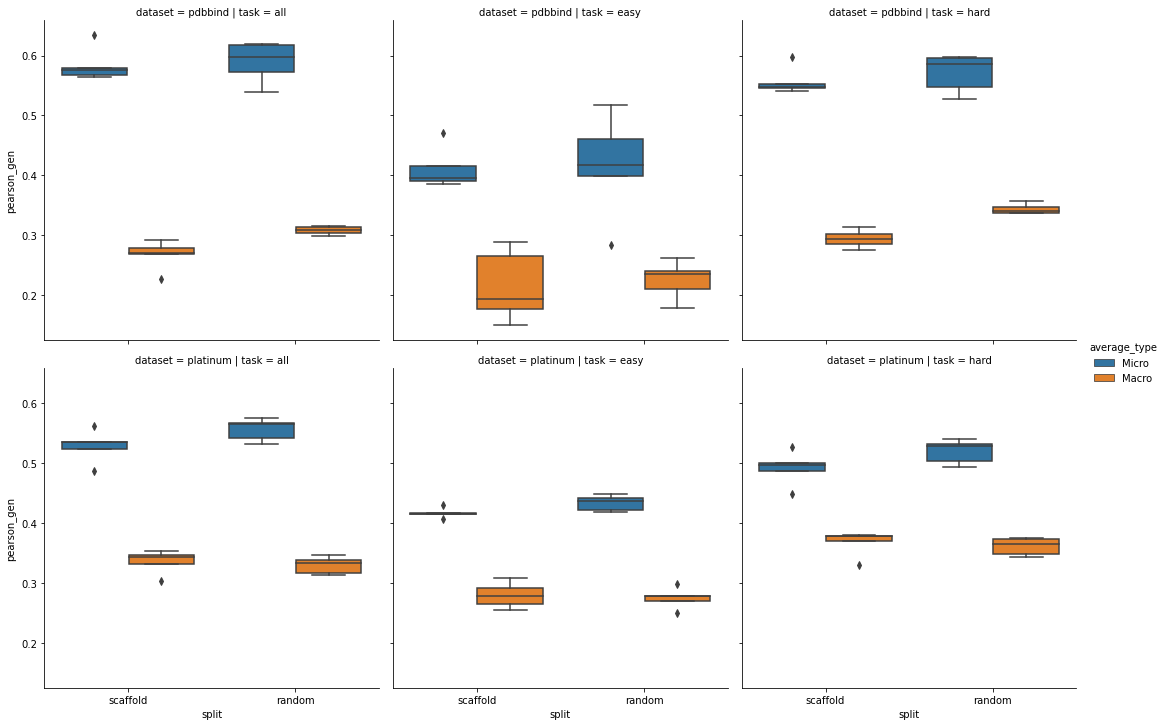

In [20]:
sns.catplot(data=regression_df, x='split', y='pearson_gen', hue='average_type', row='dataset', col='task', kind='box')

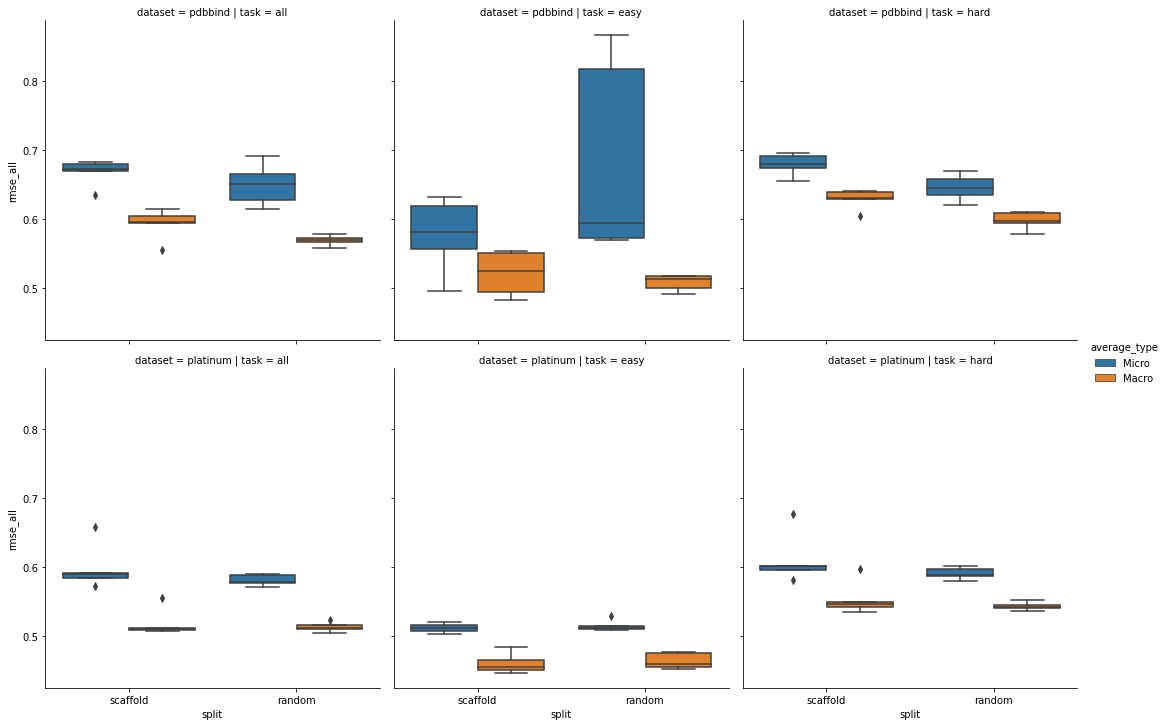

In [21]:
sns.catplot(data=regression_df, x='split', y='rmse_all', hue='average_type', row='dataset', col='task', kind='box')

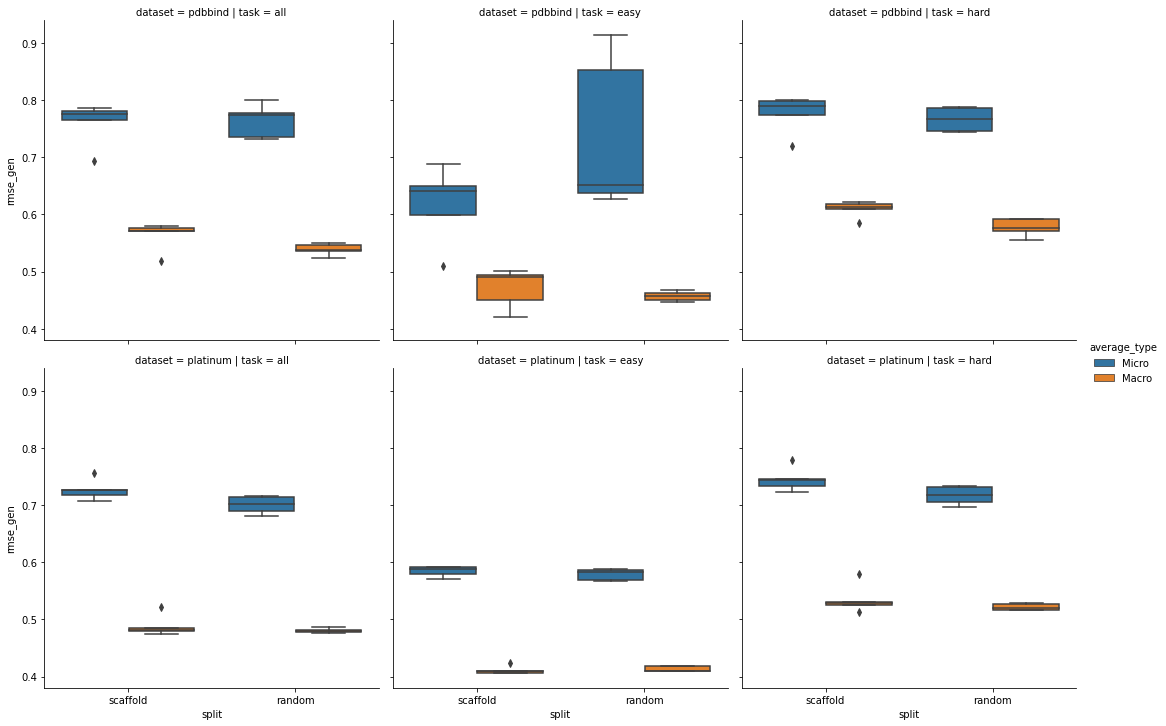

In [26]:
sns.catplot(data=regression_df, x='split', y='rmse_gen', hue='average_type', row='dataset', col='task', kind='box')

In [64]:
ranking_df['subset'] = ranking_df['task']

In [29]:
ranking_df.head()

,bedroc,dataset,ef,ranker,split,task
0,0.106387,pdbbind,0.923134,random,scaffold,all
1,0.138178,pdbbind,1.093396,energy,scaffold,all
2,0.142072,pdbbind,1.136736,ccdc,scaffold,all
3,0.215376,pdbbind,1.641459,model,scaffold,all
4,0.080521,pdbbind,0.747319,random,scaffold,easy


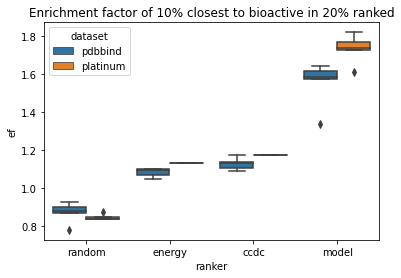

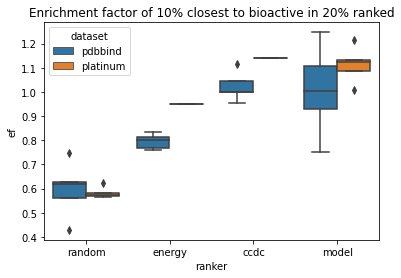

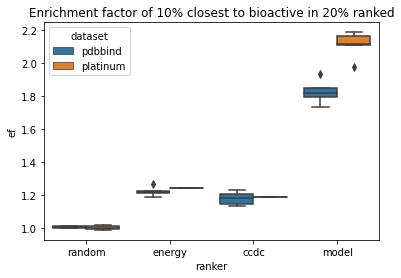

In [72]:
for subset in ['all', 'easy', 'hard'] :
    data = ranking_df[(ranking_df['split'] == 'scaffold') & (ranking_df['subset'] == subset)]
    sns.boxplot(data=data, x='ranker', y='ef', hue='dataset')
    plt.title('Enrichment factor of 10% closest to bioactive in 20% ranked')
    plt.savefig(f'figures/ef_{subset}.png', dpi=200)
    plt.show()

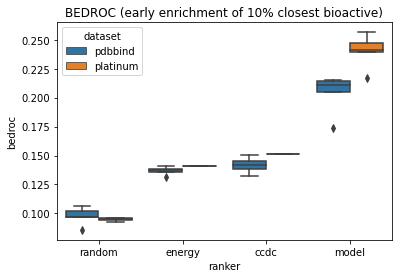

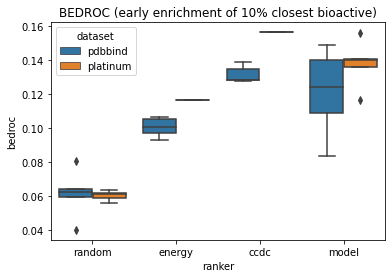

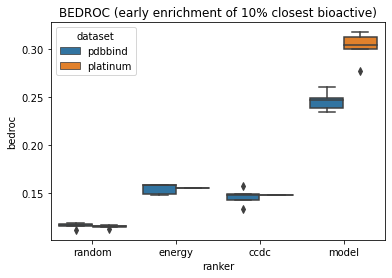

In [74]:
for subset in ['all', 'easy', 'hard'] :
    data = ranking_df[(ranking_df['split'] == 'scaffold') & (ranking_df['subset'] == subset)]
    sns.boxplot(data=data, x='ranker', y='bedroc', hue='dataset')
    plt.title('BEDROC (early enrichment of 10% closest bioactive)')
    plt.savefig(f'figures/bedroc_{subset}.png', dpi=200)
    plt.show()

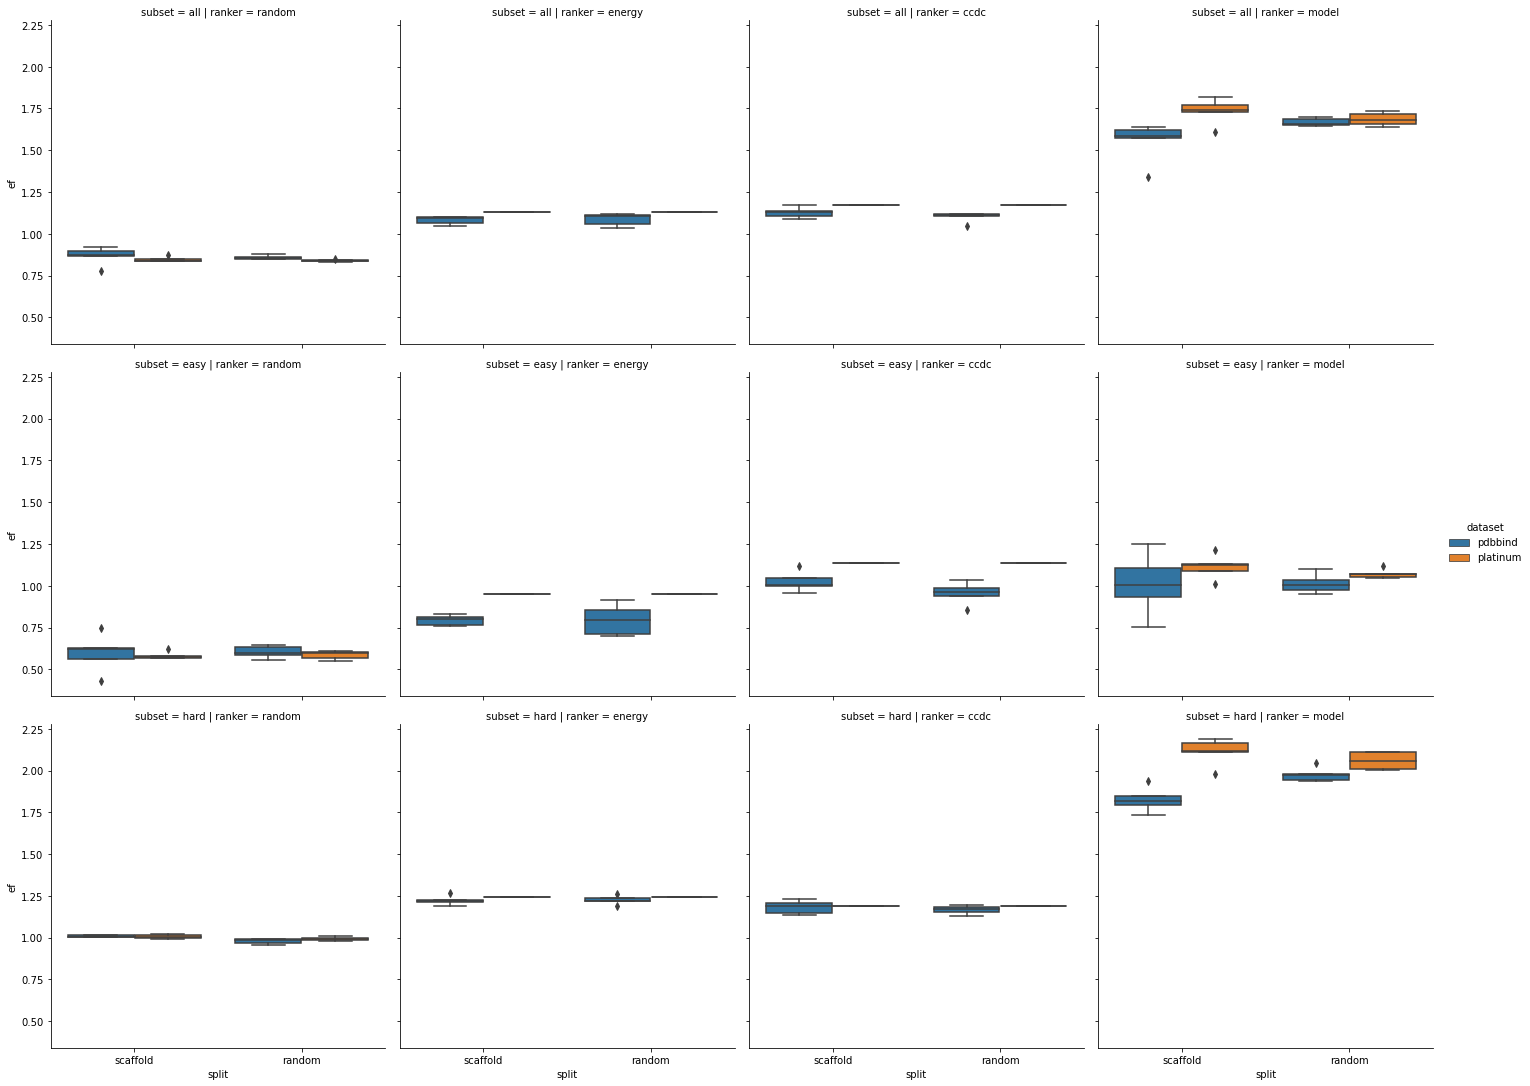

In [68]:
sns.catplot(data=ranking_df, x='split', y='ef', hue='dataset', row='subset', col='ranker', kind='box')

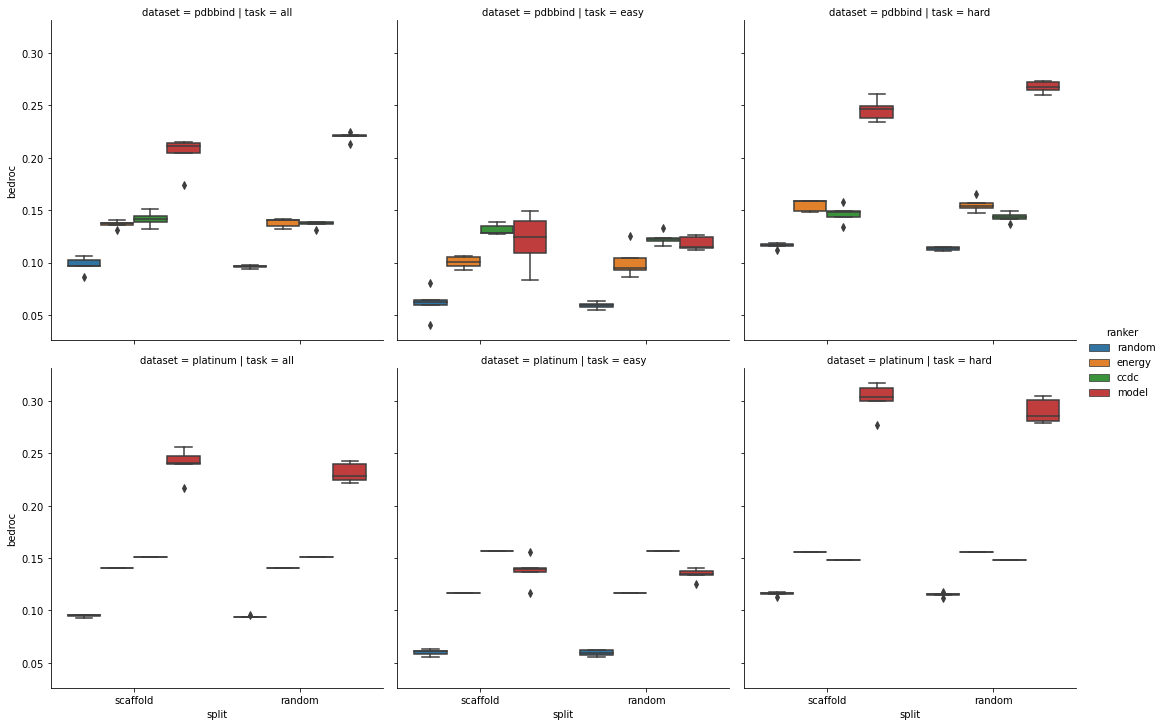

In [12]:
sns.catplot(data=ranking_df, x='split', y='bedroc', hue='ranker', row='dataset', col='task', kind='box')

In [ ]:
dataset_results

In [ ]:
for metric, value in dataset_results['bioactive_accuracy'].items() :
    bioactive_accuracy_df.loc[evaluation_name, metric] = value

In [ ]:
bioactive_accuracy_df